In [0]:
import tensorflow as tf
from keras.datasets import fashion_mnist, mnist
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical , plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.models import Model
import time
from sklearn.decomposition import PCA
# from keras.engine.input_layer import Input
from sklearn.neural_network import BernoulliRBM

In [0]:
(train_img, train_label) , (test_img, test_label) = fashion_mnist.load_data()

In [0]:
train_img = train_img.reshape(60000, 784)
test_img = test_img.reshape(10000, 784)

test_img = test_img.astype('float64')
train_img = train_img.astype('float64')

In [0]:
normalization = MinMaxScaler(feature_range = (0, 1), copy = True)
train_img = normalization.fit_transform(train_img)
test_img = normalization.transform(test_img)
train_label = to_categorical(train_label, 10)
test_label = to_categorical(test_label, 10)

In [0]:
def make_network():
  network = Sequential()
  network.add(Dense(1100, activation = 'relu', input_shape = (50, )))
  network.add(Dense(900, activation= 'relu'))
  network.add(Dense(10, activation = 'softmax'))
  network.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.SGD(learning_rate = 0.001), metrics= ['accuracy'])
  return network

In [0]:
# t1 = time.time()
network = make_network()
# t2 = time.time()

##AutoEncoder

In [0]:
In= Input(shape=(784,))
Encoder = Dense(50, activation='relu')(In)
Decoder = Dense(784, activation='sigmoid')(Encoder)
Autoencoder = Model(inputs = In, outputs = Decoder)
AEncoder = Model(In, Encoder)
Autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
Autoencoder.fit(train_img, train_img, epochs=20, batch_size=16,verbose=1)

##RBM

In [137]:
MyRBM1 = BernoulliRBM(n_components=200, n_iter=10, batch_size=10, verbose=1)
train_img = MyRBM1.fit_transform(train_img)
test_img = MyRBM1.transform(test_img)


MyRBM = BernoulliRBM(n_components=50, n_iter=10, batch_size=10, verbose=1)
train_img = MyRBM.fit_transform(train_img)
test_img = MyRBM.transform(test_img)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -7.23, time = 1.27s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -6.52, time = 1.84s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -6.37, time = 1.79s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -5.58, time = 1.79s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -6.05, time = 1.79s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -5.56, time = 1.79s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -6.27, time = 1.78s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -5.65, time = 1.80s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -5.29, time = 1.77s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -5.79, time = 1.78s


##PCA

In [0]:
pca = PCA(n_components = 50)
train_img = pca.fit_transform(train_img)
test_img = pca.transform(test_img)

In [138]:
BestModel = 'CNNbestmodel.h5'
callbacks = [ModelCheckpoint(BestModel, monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 0)]

trained_network = network.fit(train_img, train_label, batch_size = 32, epochs = 50, callbacks = callbacks, validation_split = 0.1, verbose = 1)

Epoch 1/50
1688/1688 [==============================] - 17s 10ms/step - loss: 1.9296 - accuracy: 0.5003 - val_loss: 1.6104 - val_accuracy: 0.6273
Epoch 2/50
1688/1688 [==============================] - 17s 10ms/step - loss: 1.4010 - accuracy: 0.6560 - val_loss: 1.2359 - val_accuracy: 0.6737
Epoch 3/50
1688/1688 [==============================] - 17s 10ms/step - loss: 1.1368 - accuracy: 0.6813 - val_loss: 1.0457 - val_accuracy: 0.6985
Epoch 4/50
1688/1688 [==============================] - 16s 9ms/step - loss: 0.9979 - accuracy: 0.6904 - val_loss: 0.9403 - val_accuracy: 0.6960
Epoch 5/50
1688/1688 [==============================] - 16s 9ms/step - loss: 0.9178 - accuracy: 0.6936 - val_loss: 0.8777 - val_accuracy: 0.7002
Epoch 6/50
1688/1688 [==============================] - 17s 10ms/step - loss: 0.8682 - accuracy: 0.6962 - val_loss: 0.8369 - val_accuracy: 0.6985
Epoch 7/50
1688/1688 [==============================] - 16s 10ms/step - loss: 0.8358 - accuracy: 0.6975 - val_loss: 0.8088 - v

In [139]:
test_loss, test_acc = network.evaluate(test_img, test_label, verbose = 0)
print("loss in test data is: ", test_loss)
print("accuracy in test data is : ", test_acc)

loss in test data is:  0.731201708316803
accuracy in test data is :  0.708299994468689


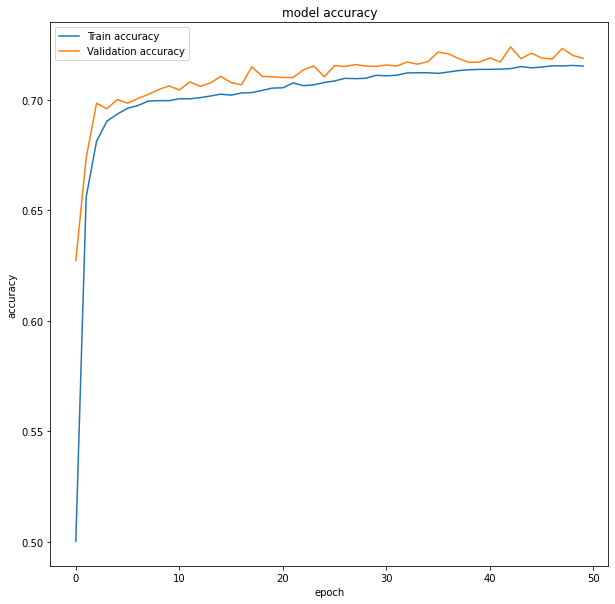

In [143]:
loss_plt = plt.figure(figsize = (10, 10))
plt.plot(trained_network.history['accuracy'])
plt.plot(trained_network.history["val_accuracy"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["Train accuracy", "Validation accuracy"])
plt.show()

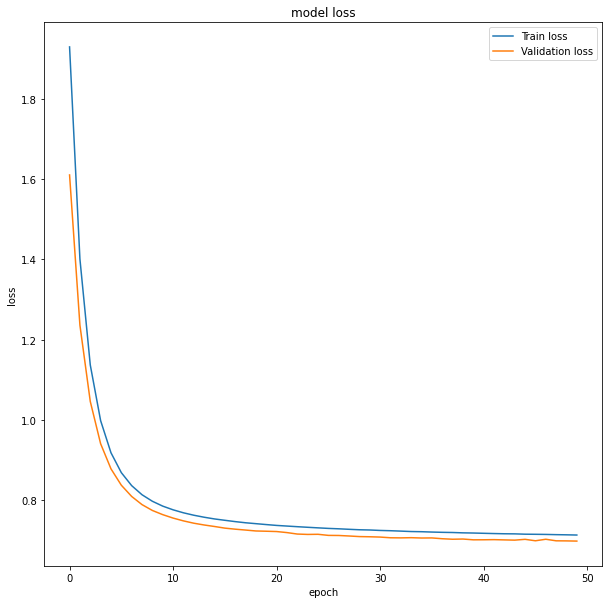

In [144]:
loss_plt = plt.figure(figsize = (10, 10))
plt.plot(trained_network.history['loss'])
plt.plot(trained_network.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["Train loss", "Validation loss"])
plt.show()


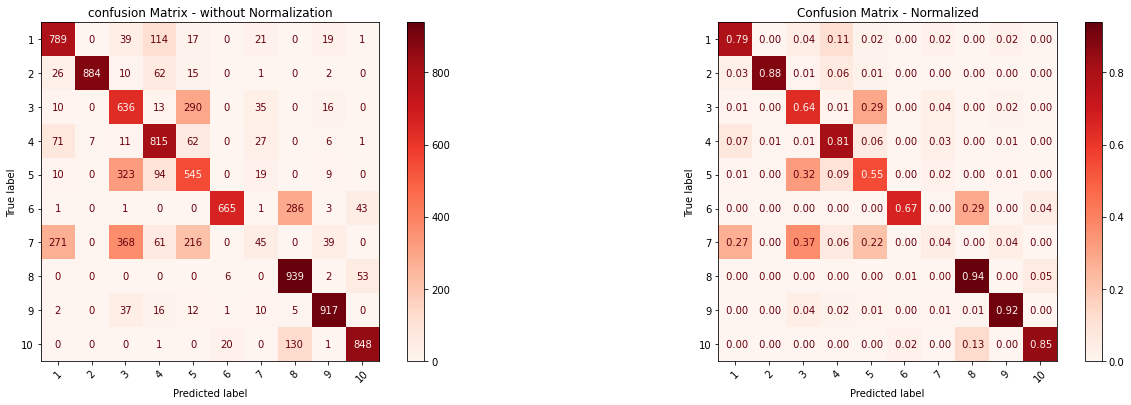

In [145]:
labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
real_label = np.argmax(test_label, axis = 1)
predicted_label = np.argmax(network.predict(test_img), axis = 1)

cm = confusion_matrix(real_label, predicted_label)
normalized_cm = confusion_matrix(real_label, predicted_label, normalize = 'true')
fig, ax = plt.subplots(nrows = 1, ncols = 2)
fig.subplots_adjust(right = 3, top = 1.3)
ax[0].title.set_text("confusion Matrix - without Normalization")
ConfusionMatrixDisplay(cm, labels).plot(cmap = plt.cm.Reds, values_format = 'd', xticks_rotation = 45, ax = ax[0])
ax[1].title.set_text("Confusion Matrix - Normalized")
ConfusionMatrixDisplay(normalized_cm, labels).plot(cmap = plt.cm.Reds, values_format = ' .2f', xticks_rotation = 45, ax = ax[1])